<a href="https://colab.research.google.com/github/ValmirJrDS/projetos_data_science_set-2021/blob/main/Analise_Madrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando Dados do Airbnb - Cidade de Madri

<center><img alt="Analisando Airbnb" width="15%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

O [Airbnb](https://news.airbnb.com/br/about-us/), é uma plataforma de hospedagem, que oferece outras opções além de hotéis, albergues e hostels para viajantes do mundo inteiro, sendo uma alternativa mais barata em relação a acomodações mais tradicionais.




O aplicativo iniciou suas atividades em 2007, na Califórnia, quando dois amigos designers tinham um espaço sobrando e decidiram hospedar três pessoas que estavam viajando e procuravam um lugar para ficar em colchões infláveis e servir café da manhã.
<center><img alt="foto teste" width="20%" src="https://raw.githubusercontent.com/ValmirJrDS/imagens/main/02.jpg"></center>


Hoje, conta com **4 milhões de anfitriões** que já receberam mais de **900 milhões de hóspedes** em quase todos os países do mundo. Todos os dias, os anfitriões oferecem acomodações e experiências únicas, que possibilitam aos hóspedes vivenciar o mundo de uma forma mais autêntica e conectada.
<center><img alt="foto teste" width="20%" src="https://raw.githubusercontent.com/ValmirJrDS/imagens/main/Dicas.png"></center>

**Neste *notebook*, irei analisar os dados referentes à cidade Madri, e extrairei o máximo de insihgts posiveis atraves de dados públicos.**

<center><img alt="foto teste" width="55%" src="https://raw.githubusercontent.com/ValmirJrDS/imagens/main/madri.jpg"></center>



---


Madrid é a capital de Espanha, possue um clima temperado onde invernos mais frios e verões mais quentes devido a distancia ao mar.

Madrid é berço de uma das casas reais mais poderosas da Europa e foi Capital Europeia da Cultura em 1992.Madrid é berço de uma das casas reais mais poderosas da Europa e foi Capital Europeia da Cultura em 1992.

Madrid conta com mais de 800 estabelecimentos hoteleiros, desde os mais luxuosos às mais modestas pensões populares.

A capital espanhola é, depois de Barcelona, o segundo maior centro industrial do país, com indústrias de:
 * Aeronâutica
 * Equipamento elétrico
 * Maquinaria agrícola
 * Artigos em pele
 * Indústria química
 * Farmacêutica

Possui um largo número de instituições ligadas à educação, entre as quais várias universidades.


# Obtenção dos Dados

Os dados utilizado nesse projeto de analise, foi esxtraido diretamente do [Inside Airbnb](http://insideairbnb.com/get-the-data.html). Precisa ser levado em consideração a versão reduzida do Dataset.

In [ ]:
# importação de todas as bibliotecas necessárias
## para essa analise
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno
 
from bokeh.io import output_notebook, show
from bokeh.io import output_notebook, show
from bokeh.palettes import brewer, Spectral, Viridis3, Viridis256, d3
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, BasicTicker, ColorBar, LinearColorMapper
from bokeh.transform import cumsum, factor_cmap, transform, jitter
 
from math import pi
 
output_notebook()

# Análise dos Dados


## 1- Organização e visualizção dos atributos(variáveis)

### 1.1- Importar Dataset e verificar suas entradas reconhecendo suas dimensões 

In [ ]:
#Chamar cidade de Madri para começar a analise
df= pd.read_csv("http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2021-07-07/visualisations/listings.csv", index_col='id')
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

Dimensões do Dataset 
Variáveis:  15 
Entradas:  19612


### 1.2 - Tradução dos atributos(variáveis)
Traduzi as váriaveis para simplificar o entendimento e a clareza para crias as variaveisa

In [ ]:
#como nesse caso o dataset possui poucas colunas
#substituir o nome das variaveis para facilitara a interpretação e indice
subst_variaveis= {'name':'nome', 'host_id':'prop_id','neighbourhood_group':'vizinhanca', 'neighbourhood':'bairro',
                  'room_type':'quarto_tipo', 'price':'preco', 'minimum_nights':'quant_noite_min', 'dono':'proprietario',
                    'number_of_reviews':'avaliacoes', 'last_review':'ult_avaliacao', 'reviews_per_month':'avaliacoes_mes',
                 'calculated_host_listings_count':'imoveis_prop', 'availability_365':'dias_ano'}
df.rename(columns=subst_variaveis, inplace=True)

### 1.3 - Criar um dicionário para guiar no melhor entendimento

 **Dicionário das variáveis**

id - identificação numerica do imovel

nome - nome anunciado do imovel

prop_id - identificação numerica do proprietario(dono) e/ou responsavel

proprietario - nome do proprietario(dono) e/ou responsavel

vizinhanca - esta coluna não contem nenhum dado relevante

bairro - bairro onde situa o imovel

latitude - coordenada em laitude

longitude - coordenad em longitude

quarto_tipo - tipo do quarto ofertado

preco - valor para alugar o imovel

quant_noite_min - quantidade minima para que seja alugado o imovel

avaliacoes - quatidade de avaliações(reviews) que o imovel possui

ult_avaliacao - data da ultima avaliaçção(review)

avaliacoes_mes - quantidade de avaliações por mes

imoveis_prop - quantidade de imoveis do mesmo proprietario

dias_ano - número de dias de disponibilidade dentro do ano

Agora com as variaveis traduzidas e substituidas por expressoes mais 
claras, iremos realizar uma vistoria e verificar a possibilidades de analises no nosso "dataset", visualizando as 10(dez) primeiras linhas e as 10(dez) ultimas para tentar logo de cara verificar logo de cara se há dados faltantes e sua relevancia.

In [ ]:
df.head(3)

,nome,prop_id,host_name,vizinhanca,bairro,latitude,longitude,quarto_tipo,preco,quant_noite_min,avaliacoes,ult_avaliacao,avaliacoes_mes,imoveis_prop,dias_ano
id,,,,,,,,,,,,,,,
6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,79,2019-05-14,1.23,1,180
21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,33,2018-05-29,0.40,2,364
23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,0,NaN,NaN,8,341


In [ ]:
df.ult_avaliacao= pd.to_datetime(df.ult_avaliacao, format='%Y-%m-%d')
df["ult_avaliacao"].head(1)

id
6369   2019-05-14
Name: ult_avaliacao, dtype: datetime64[ns]

## 2 - Verificar se existe e onde se encontra o maior numero de Outilers

In [ ]:
#criar 2 vairaveis, uma carregando os valores nulos
#e outra sumando os valores nulos carregados
nulos= df.isnull()
total= nulos.sum()
porcentagem= ((total/nulos.count())*100)
#criar variavel para cocatenar as variaveis total+porcentagem
df_faltantes= pd.concat([total, porcentagem], axis=1, keys=['Total Faltantes', 'Percentual'])
#eliminar os resultados zerados
df_faltantes= df_faltantes[df_faltantes['Total Faltantes']>0]
#exibir resultado
df_faltantes.sort_values(by='Percentual', ascending=False)

,Total Faltantes,Percentual
ult_avaliacao,5692,29.023047
avaliacoes_mes,5692,29.023047
host_name,90,0.458903
nome,3,0.015297


### 2.1 - Como está a descrição estatisticamente das variaveis numericas

In [ ]:
df.describe().round(1)

,prop_id,latitude,longitude,preco,quant_noite_min,avaliacoes,avaliacoes_mes,imoveis_prop,dias_ano
count,19612.0,19612.0,19612.0,19612.0,19612.0,19612.0,13920.0,19612.0,19612.0
mean,132986529.8,40.4,-3.7,128.0,6.6,31.3,1.2,10.9,164.2
std,120583808.2,0.0,0.0,456.0,32.7,63.7,1.4,26.3,141.8
min,7952.0,40.3,-3.9,0.0,1.0,0.0,0.0,1.0,0.0
25%,26935365.8,40.4,-3.7,35.0,1.0,0.0,0.2,1.0,1.0
50%,99018982.0,40.4,-3.7,60.0,2.0,4.0,0.6,2.0,150.0
75%,227596632.5,40.4,-3.7,100.0,3.0,30.0,1.7,7.0,324.0
max,410994611.0,40.6,-3.6,9999.0,1125.0,724.0,18.0,194.0,365.0


### 2.3  - Plotando um bloxpot e histogramas para melhor visualização dos outliers

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


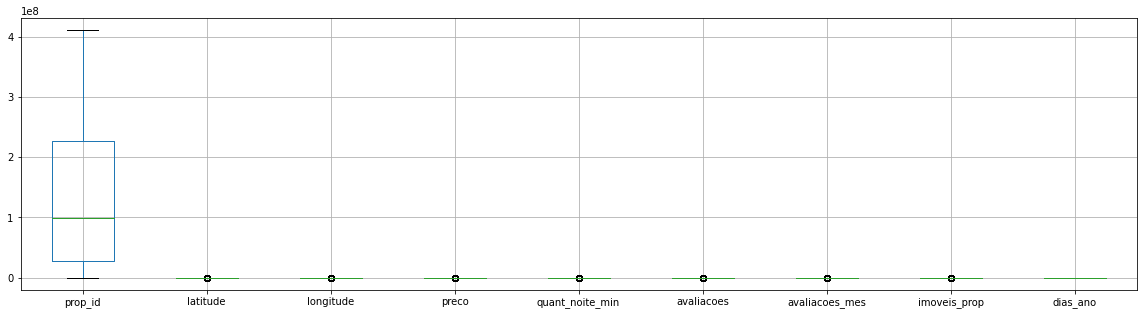

In [ ]:
plt.figure(figsize=(20,5))
df.boxplot()
plt.show()

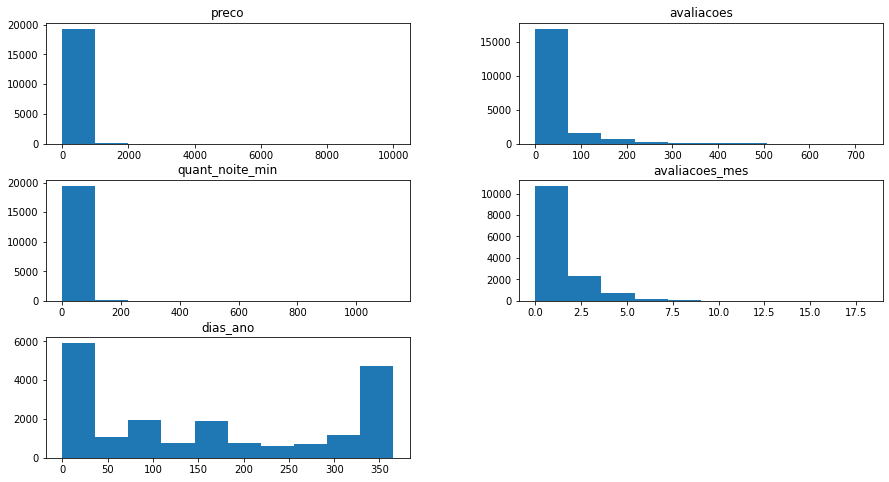

In [ ]:
df[["preco", "avaliacoes", "quant_noite_min", "avaliacoes_mes", 
    "dias_ano"]].hist(figsize=(15,8), grid=False);

## 3 - Tratando os Outilers
Analisando o histograma com as principas variaveis, podemos observar as discrepancias evidentes, tais como:
* Preços com valores 0,00, visto que não existe diaria com esse valor, bem como a variavel dias_ano que medi a frenquencia de dias locados tambem com o dia "0"
* quantidades de noites minima com valores fora da realidade como 1125 noites.

Na minha analise é primordial que as seguintes variaveis sejam tratados seus outliers:
- preco
- avaliacoes
- quant_noite_min
- avaliacoes_mes
- dias_ano

Verificando os histogramas, conseguimos ver claramente que temos outliers presentes. Para tratá-los vamos seguir os seguintes passos:

- Definir o Q1 e Q3 para as variáveis que serão limpas.
- Calcular o IQR para as variáveis.
- Definir o limite superior e inferior para cortar os outliers.
- Remover os outliers.

### 3.1 - Encontrando os quartis para que possamos descubrir o IQR

In [ ]:
# identificar os outliers para a variavel preco
q1_preco = df.preco.quantile(.25)
q3_preco = df.preco.quantile(.75)
IQR_preco = q3_preco - q1_preco
print('IQR da variavel preço: ', IQR_preco)

# definindo os limites
sup_preco = q3_preco + 1.5 * IQR_preco
inf_preco = q1_preco - 1.5 * IQR_preco

print('Limite superior de preço: ', sup_preco)
print('Limite inferior de preço: ', inf_preco)

IQR da variavel preço:  65.0
Limite superior de preço:  197.5
Limite inferior de preço:  -62.5


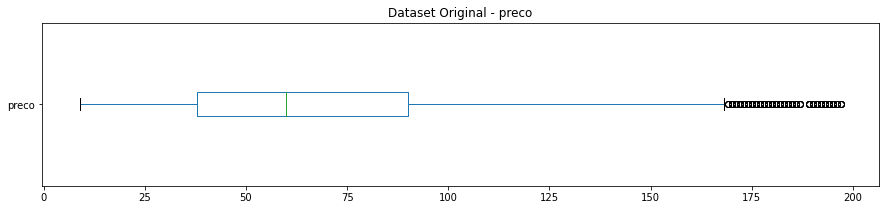

O dataset possui 8203 colunas
0 Entradas acima de 197.5
Representam 0.00% do dataset


In [ ]:
#verificando o conjunto original com boxplot
fig, ax = plt.subplots(figsize=(15,3))
df_clean.preco.plot(kind='box', vert=False);
ax.set_title('Dataset Original - preco')
plt.show()
print("O dataset possui {} colunas".format(df_clean.shape[0]))
print("{} Entradas acima de 197.5".format(len(df_clean[df_clean.preco > 197.5])))
print("Representam {:.2f}% do dataset".format((len(df_clean[df_clean.preco > 197.5]) / df_clean.shape[0])*100))

In [ ]:
# identificar os outliers para a variavel avaliacoes
q1_avaliacoes = df.avaliacoes.quantile(.25)
q3_avaliacoes = df.avaliacoes.quantile(.75)
IQR_avaliacoes = q3_preco - q1_preco
print('IQR da variavel avaliacoes: ', IQR_avaliacoes)
#DEFINIR LIMITES
sup_aval = q3_avaliacoes + 1.5 * IQR_avaliacoes
inf_aval = q1_avaliacoes - 1.5 * IQR_avaliacoes
print('Limite sup de avaliacoes: ', sup_preco)
print('Limite inf de avaloacoes: ', inf_aval)

IQR da variavel avaliacoes:  65.0
Limite sup de avaliacoes:  197.5
Limite inf de avaloacoes:  -97.5


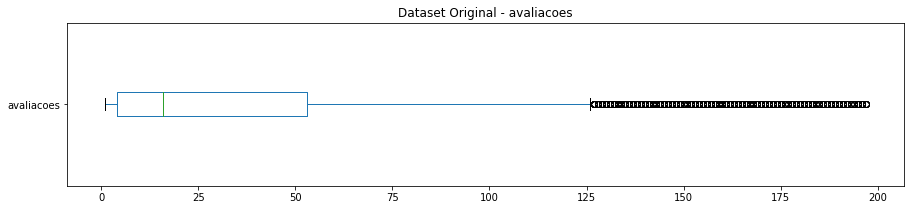

O dataset possui 8203 colunas
0 Entradas acima de 197.5
Representam 0.00% do dataset


In [ ]:
#verificando o conjunto original com boxplot
fig, ax = plt.subplots(figsize=(15,3))
df_clean.avaliacoes.plot(kind='box', vert=False);
ax.set_title('Dataset Original - avaliacoes')
plt.show()
print("O dataset possui {} colunas".format(df_clean.shape[0]))
print("{} Entradas acima de 197.5".format(len(df_clean[df_clean.avaliacoes > 197.5])))
print("Representam {:.2f}% do dataset".format((len(df_clean[df_clean.avaliacoes > 197.5]) / df_clean.shape[0])*100))

In [ ]:
#verificando outliers variavel quant_minima
q1_qtmin = df.quant_noite_min.quantile(.25)
q3_qtmin = df.quant_noite_min.quantile(.75)
IQR_qtmim = q3_qtmin - q1_qtmin
print('IQR para variavel quant_noite_min: ', IQR_qtmim)

#definir limites
sup_qtmin = q3_qtmin + 1.5 * IQR_qtmim
inf_qtmin = q1_qtmin - 1.5 * IQR_qtmim
print('Limite superior vriavel: ', sup_qtmin)
print('Limite inferior variavel: ', inf_qtmin)

IQR para variavel quant_noite_min:  2.0
Limite superior vriavel:  6.0
Limite inferior variavel:  -2.0


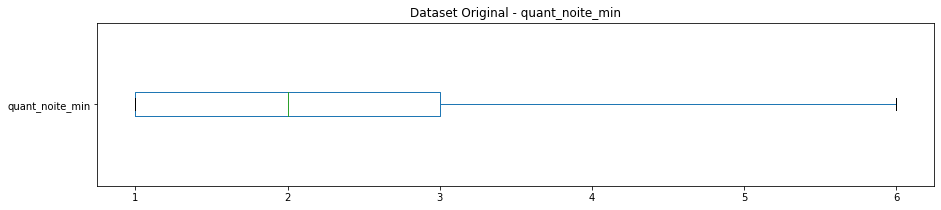

O dataset possui 8203 colunas
0 Entradas acima de 6
Representam 0.00% do dataset


In [ ]:
#verificando o conjunto original com boxplot
fig, ax = plt.subplots(figsize=(15,3))
df_clean.quant_noite_min.plot(kind='box', vert=False);
ax.set_title('Dataset Original - quant_noite_min')
plt.show()
print("O dataset possui {} colunas".format(df_clean.shape[0]))
print("{} Entradas acima de 6".format(len(df_clean[df_clean.quant_noite_min > 6])))
print("Representam {:.2f}% do dataset".format((len(df_clean[df_clean.quant_noite_min > 6]) / df_clean.shape[0])*100))

In [ ]:
#verificando outliers variavel dias_ano
q1_dias_ano = df_clean.dias_ano.quantile(.25)
q3_dias_ano = df_clean.dias_ano.quantile(.75)
IQR_dias_ano = q3_dias_ano - q1_dias_ano
print('IQR para a variavel dias_ano: ', IQR_dias_ano)
#limites para a veriavel dias_ano
sup_dias_ano = q3_dias_ano + 1.5 * IQR_dias_ano
inf_dias_ano = q1_dias_ano - 1.5 * IQR_dias_ano
print('Limite superior variavel:', sup_dias_ano)
print('Limite inferior variavel:', inf_dias_ano)

IQR para a variavel dias_ano:  249.0
Limite superior variavel: 712.5
Limite inferior variavel: -283.5


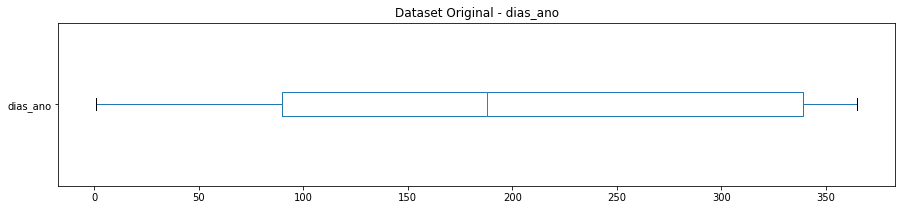

O dataset possui 8203 colunas
0 Entradas acima de 6
Representam 0.00% do dataset


In [ ]:
#verificando o conjunto original com boxplot
fig, ax = plt.subplots(figsize=(15,3))
df_clean.dias_ano.plot(kind='box', vert=False);
ax.set_title('Dataset Original - dias_ano')
plt.show()
print("O dataset possui {} colunas".format(df_clean.shape[0]))
print("{} Entradas acima de 6".format(len(df_clean[df_clean.dias_ano > 780.0])))
print("Representam {:.2f}% do dataset".format((len(df_clean[df_clean.dias_ano > 780.0]) / df_clean.shape[0])*100))

In [ ]:
df_clean = df.copy()
#limpando as variaveis
df_clean.drop(df_clean[df_clean.preco > 197.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.preco == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.avaliacoes > 197.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.avaliacoes == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.quant_noite_min > 6.0].index, axis=0, inplace=True) 
df_clean.drop(df_clean[df_clean.dias_ano == 0.0].index, axis=0, inplace=True)         

print('Shape antes limpeza: ', df.shape)
print('Shape após limpeza: ', df_clean.shape)


Shape antes limpeza:  (19612, 15)
Shape após limpeza:  (8203, 15)


### 3.2 - Como ficaram as variaveis depois do tratamento dos Outilers

In [ ]:
df_clean.describe().round(1)

,prop_id,latitude,longitude,preco,quant_noite_min,avaliacoes,avaliacoes_mes,imoveis_prop,dias_ano
count,8203.0,8203.0,8203.0,8203.0,8203.0,8203.0,8203.0,8203.0,8203.0
mean,128504737.5,40.4,-3.7,68.5,2.1,36.6,1.2,11.4,210.0
std,118001263.4,0.0,0.0,39.6,1.2,45.6,1.2,25.9,122.1
min,13660.0,40.3,-3.9,9.0,1.0,1.0,0.0,1.0,1.0
25%,24719318.0,40.4,-3.7,38.0,1.0,4.0,0.3,1.0,90.0
50%,99018982.0,40.4,-3.7,60.0,2.0,16.0,0.8,2.0,188.0
75%,219730736.0,40.4,-3.7,90.0,3.0,53.0,1.8,8.0,339.0
max,409844752.0,40.6,-3.6,197.0,6.0,197.0,18.0,194.0,365.0


Percebemos acima que nas variaveis que iremos usar os outilers já não se encontram

## 4 - Visualizações Graficas e conteúdo infomativo sobre a Analise propriamente dita

### 4.1 - Correlação entre as Variaveis

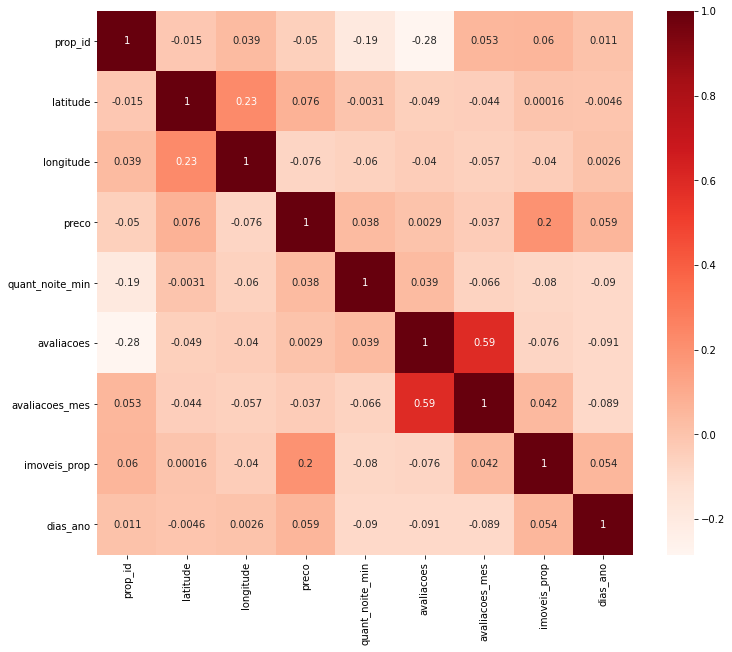

In [ ]:
plt.figure(figsize=(12,10))
corr_matrix = df_clean.corr()
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

Percebemos uma fraca correlação entre as variaveis, principalmene as principasi para nossa análise:
* preço
* Tipo de quartos
* Dias ocupação por ano
* Avaliações

Seguimos mesmo assim com a análise!

### 4.2 - Qual a Localização mais cara em Madrid

In [ ]:
df_clean.groupby(['bairro']).preco.mean().sort_values(ascending=False)[:10]

bairro
Castellana    97.500000
Recoletos     93.976744
Almagro       93.705882
Goya          89.958333
El Plantío    87.666667
Argüelles     85.563025
Corralejos    84.666667
Valdemarín    84.500000
Cortes        84.077720
Niño Jesús    83.687500
Name: preco, dtype: float64

<right><img alt="Castella" width="35%" src="https://raw.githubusercontent.com/ValmirJrDS/imagens/main/castellana%2002.jpg"></right>

Por ser um bairro comercial de luxo de Castellana cobre parte da Golden Mile, um elegante trecho de butiques por trás de grandes fachadas do século 19. 
Restaurantes gourmet ficam ao lado de bares de tapas antigos, e locais elegantes para vinhos e coquetéis mantêm o bairro animado à noite. Em meio às embaixadas estrangeiras.

Devido as caracteristas se torna a localidade mais procurada em Madrid

### 4.3 - Qual a Localização mais barata em Madrid?

In [ ]:
df_clean.groupby(['bairro']).preco.mean().sort_values(ascending=False)[116:126]

bairro
Media Legua      34.444444
La Paz           34.400000
Fontarrón        34.250000
Zofío            34.142857
Campamento       33.923077
Aluche           33.428571
Los Rosales      32.473684
Portazgo         30.214286
San Cristobal    30.166667
Amposta          26.333333
Name: preco, dtype: float64

<right><img alt="Castella" width="25%" src="https://raw.githubusercontent.com/ValmirJrDS/imagens/main/amposta.jpg"></right>

Por se tratar de um bairro mais administrativo e residencial, Amposta é sem duvidas a localidade menos desejada por turistas em Madrid

### 4.4 - Analise de tipos de Imóveis:
* Private room - Sala Privada
* Entire Home/apt - Home/apt completo
* Shared room - Quarto compartilhado
* Hotel room - Quarto de Hotel



#### - Tipos de quaro X Localização

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


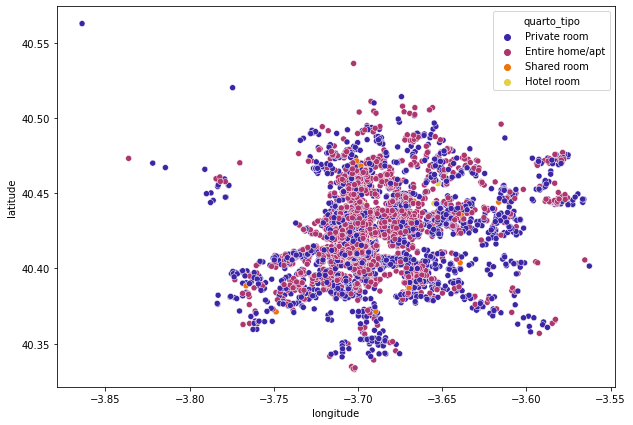

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(df_clean.longitude, df_clean.latitude, hue=df_clean.quarto_tipo, 
                palette="CMRmap");

Percebemos pelo grafico acima, que se concentra no centro,  o maior numero de imoveis locações e bem claro que Salas Privadas e Casas/Apt completos são as preferencias.

Fato esse, considerando os melhores bairros localizados no centro de Madrid, pois nessa localização se encontram os polos comerciais e gastronomicos, bem como os melhores pontos turisticos.

#### Tipos de quarto X Preço

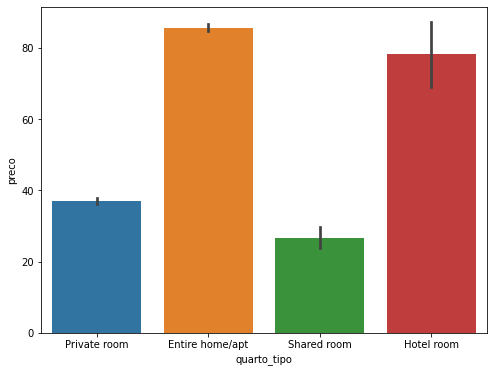

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='quarto_tipo', y='preco', data=df_clean);

Devida a localização previlegiada as Casas/apt completos tornam os imoveis mais caros em Madrid.
Seguido dos Hoteis, mesmo com aproveitamento variavel por conta das estações do ano.

In [ ]:
data = df_clean[['quarto_tipo','avaliacoes']]
cats = list(df_clean.quarto_tipo.unique())

source = ColumnDataSource(data)

p = figure(plot_width=880, plot_height=500, y_range=cats, title="TIPOS DE QUARTOS MAIS BEM AVALIADOS")

p.circle(x='avaliacoes', y=jitter('quarto_tipo', width=0.4, range=p.y_range),  source=source, alpha=0.4)

p.x_range.start = 0
p.x_range.end = 200

p.x_range.range_padding = 1
p.ygrid.grid_line_color = None

show(p)

#### Tipos de Quato X Disponibilidade por ano


In [ ]:
# Bairro mais procurados
df_clean.groupby(['bairro', 'quarto_tipo']).dias_ano.mean().sort_values(ascending=False)[:20]


bairro         quarto_tipo    
Pueblo Nuevo   Shared room        365.000000
Adelfas        Shared room        365.000000
Aguilas        Shared room        365.000000
Lista          Shared room        365.000000
Horcajo        Private room       365.000000
Aluche         Shared room        365.000000
Media Legua    Entire home/apt    364.000000
San Fermín     Shared room        364.000000
Almenara       Shared room        364.000000
Salvador       Entire home/apt    359.000000
Prosperidad    Shared room        358.000000
Piovera        Hotel room         357.000000
Hellín         Entire home/apt    354.000000
Canillas       Hotel room         353.666667
Argüelles      Hotel room         351.000000
Rios Rosas     Hotel room         337.500000
Aeropuerto     Entire home/apt    336.000000
Palacio        Hotel room         327.800000
San Cristobal  Private room       327.400000
Campamento     Private room       326.454545
Name: dias_ano, dtype: float64

<right><img alt="Pueblo Nuevo" width="25%" src="https://raw.githubusercontent.com/ValmirJrDS/imagens/main/Pueblo%20Nuevo.jpg"></right>

Devido a sua centralidade e onde esta construida a estação principal, **PUERTO NUEVO** é sem duvida a localização mais locada pelo Airbnb em Madrid.

Visto que utilizando a estação de metro de **Puerto Nuevo** para **Castella**, dura apenas 25 minutos.

## CONCLUSÕES - 

Foi realizado apenas análises superficiais devido a mal qualidade das informações no Dataset, onde observamos uma grande número de *Outliers*.
Mesmo assim podemos verificar que em Madrid há um grande número de imóveis, mesmo com poucos pontos turisticos.

A cidade, devido a seus polos industriais e gastronomicos atrai muitos Profissionais e turistas.

Em uma proxima analise precisaremos fazer uso de um dataset com uma abordagem mais agressiva, contendo mais atributos.